In [10]:
def get_start_curve(Fp2):
    """Gives the j-invariant of a supersingular elliptic curve over Fp2"""
    p = Fp2.characteristic()
    q = next(q for q in Primes() if q%4 == 3 and kronecker_symbol(-q,p) == -1)
    K = QuadraticField(-q)
    H = K.hilbert_class_polynomial()
    j0 = H.change_ring(Fp2).any_root()
    return j0

def get_L_graph_undirected(p, L_list):
    """Finds the L-isogeny graph over Fpbar, for the given list of L's.
    Note that each edge is (start_vertex, end_vertex, label) where the we're using the label to store the degree of the isogeny."""
    Fp2 = GF(p**2)
    j = get_start_curve(Fp2)
    E = EllipticCurve_from_j(j)
    edges = []
    for ell in L_list:
        G_ell = E.isogeny_ell_graph(ell, directed=False, label_by_j=True)
        for edge in G_ell.edges():
            edges.append((edge[0], edge[1], ell))
    return Graph(edges,loops=True,multiedges=True)

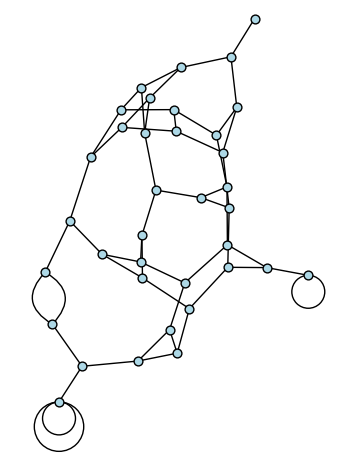

In [ ]:
p = 419
G = get_L_graph_undirected(p, [2])

G.plot(vertex_labels=False, vertex_size=40, vertex_color="lightblue")

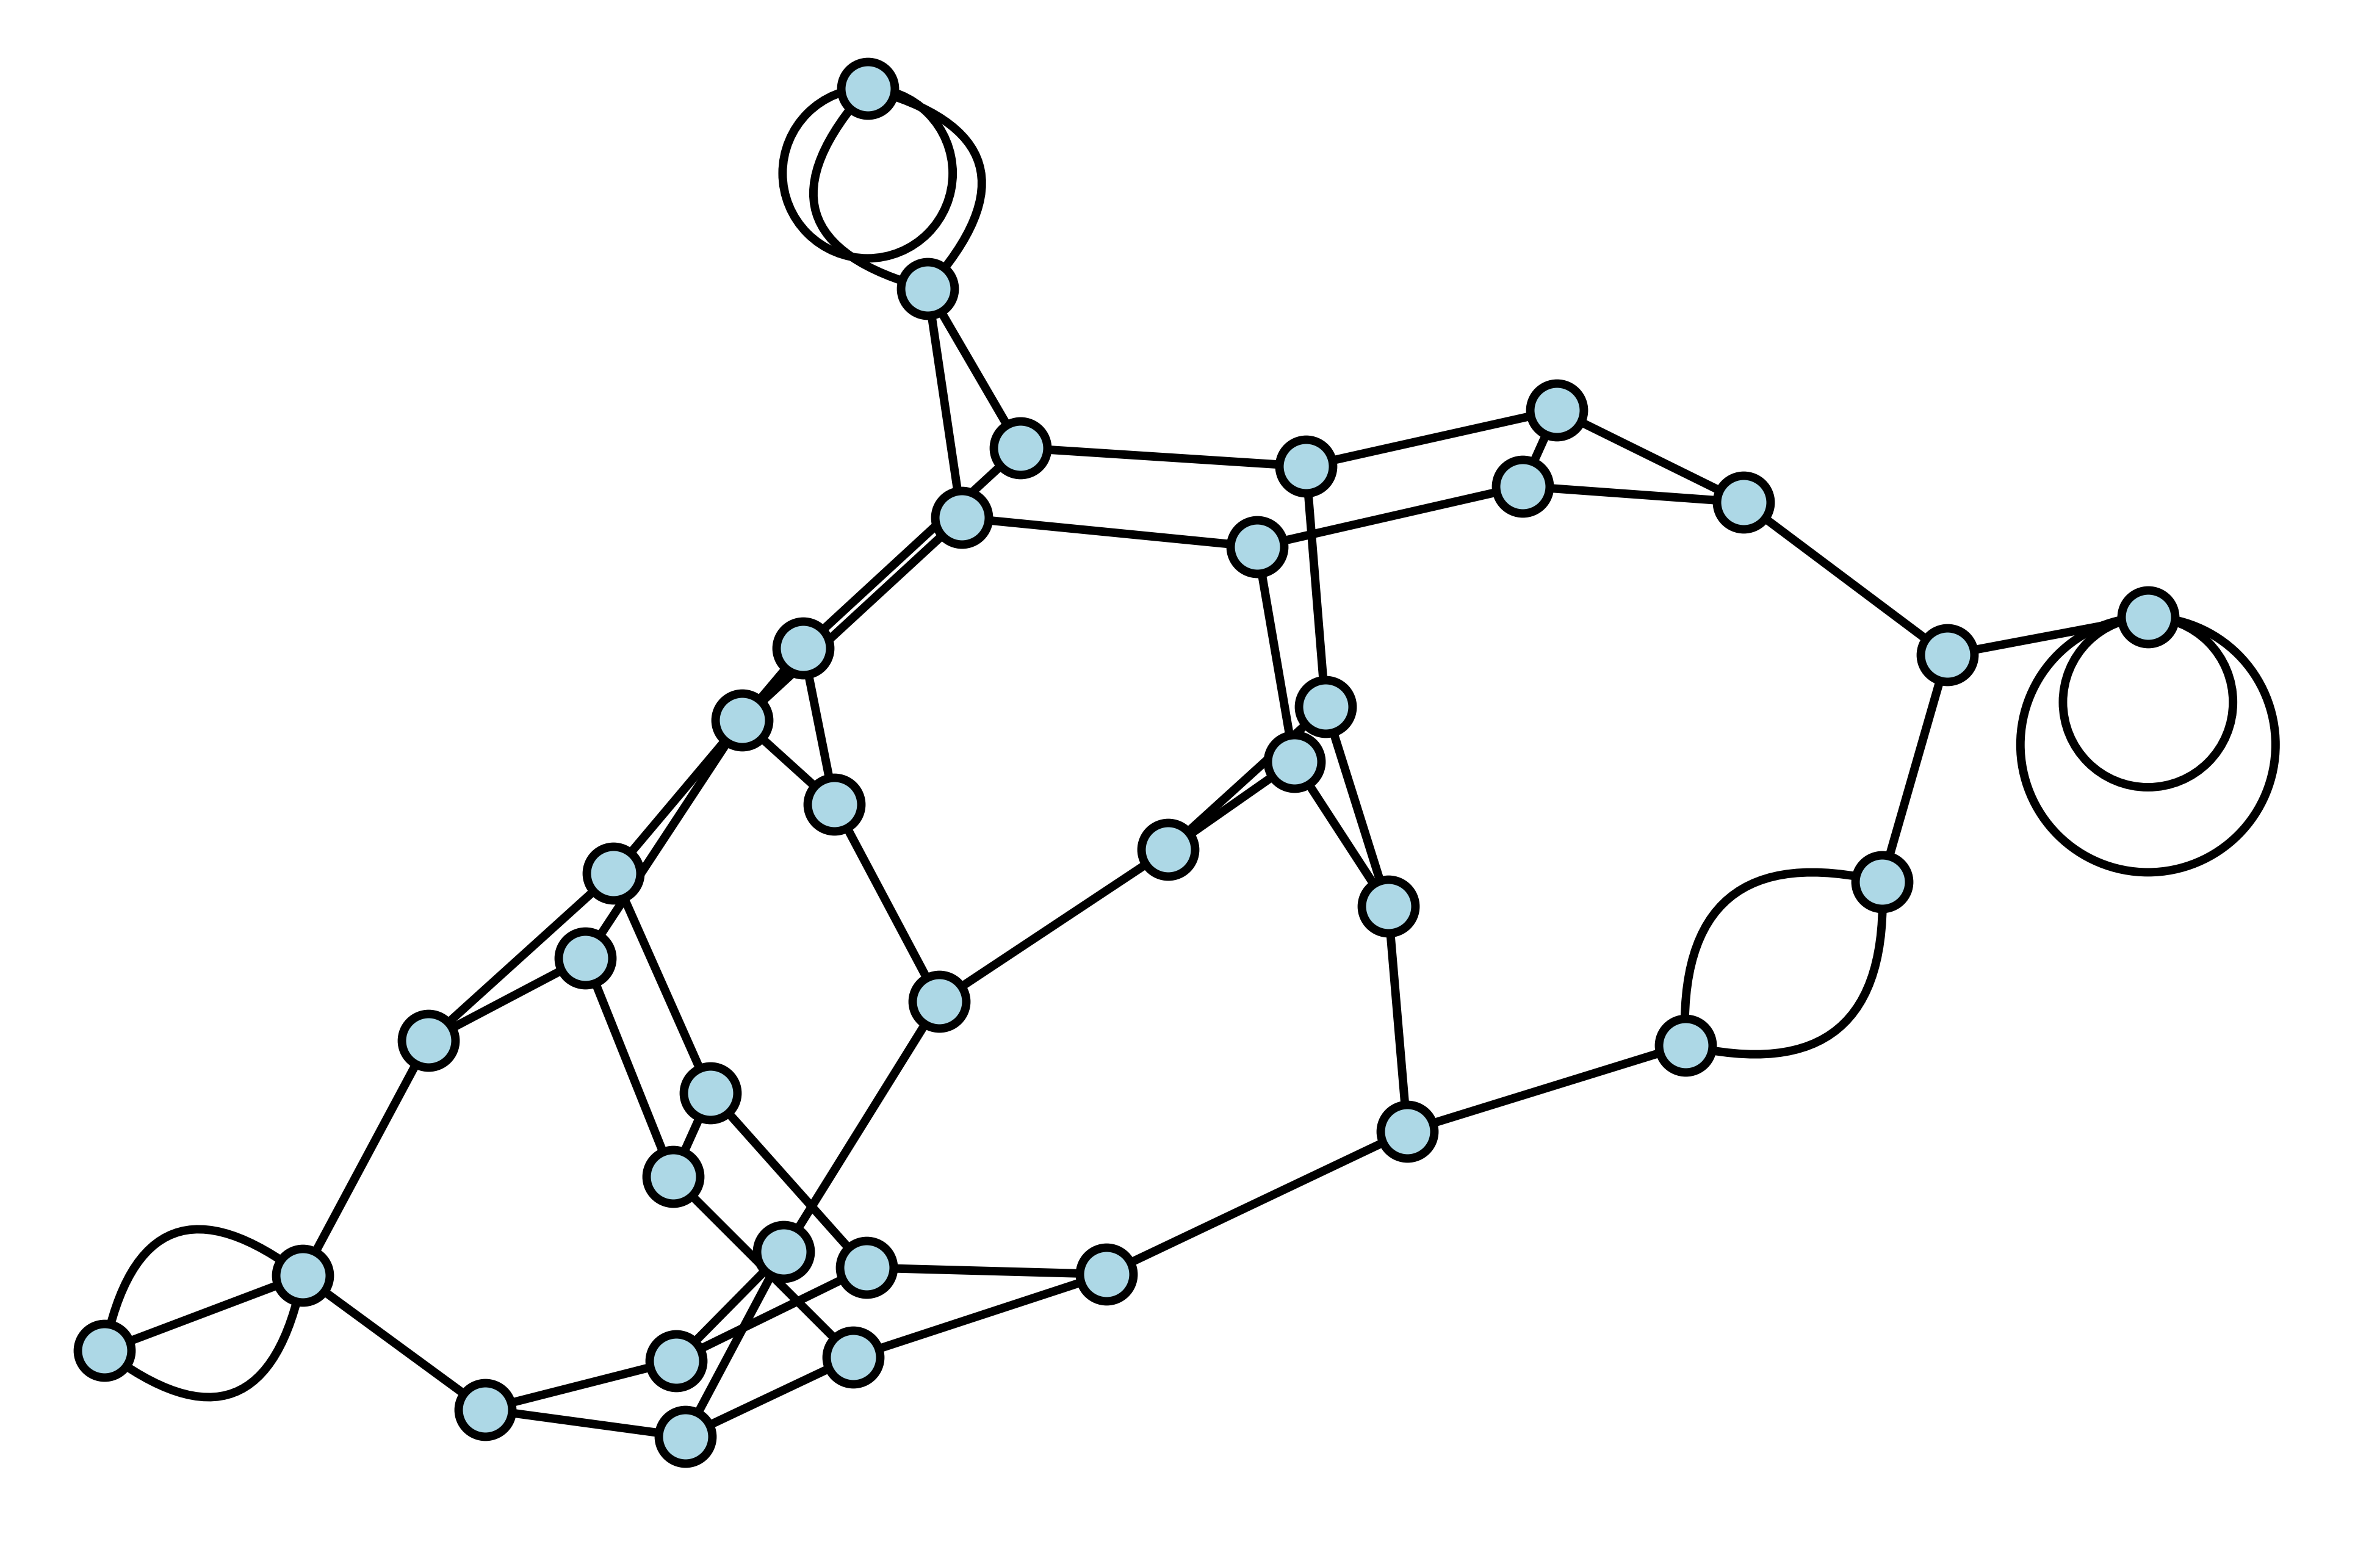

In [584]:
G.graphplot(iterations=100000, vertex_labels=False, vertex_size=40, vertex_color="lightblue", transparent=True, dpi=1000).show()

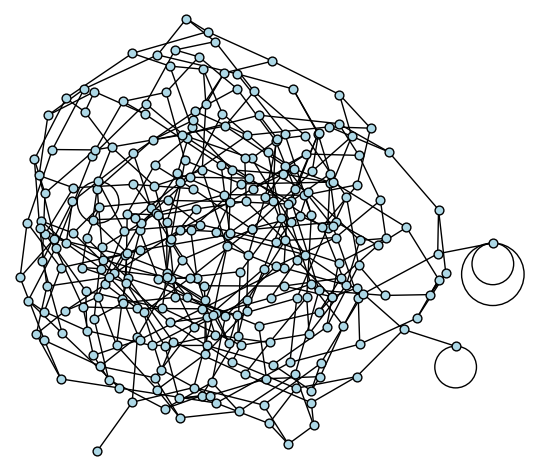

In [15]:
p = 3407
G = get_L_graph_undirected(p, [2])

G.plot(vertex_labels=False, vertex_size=40, vertex_color="lightblue")

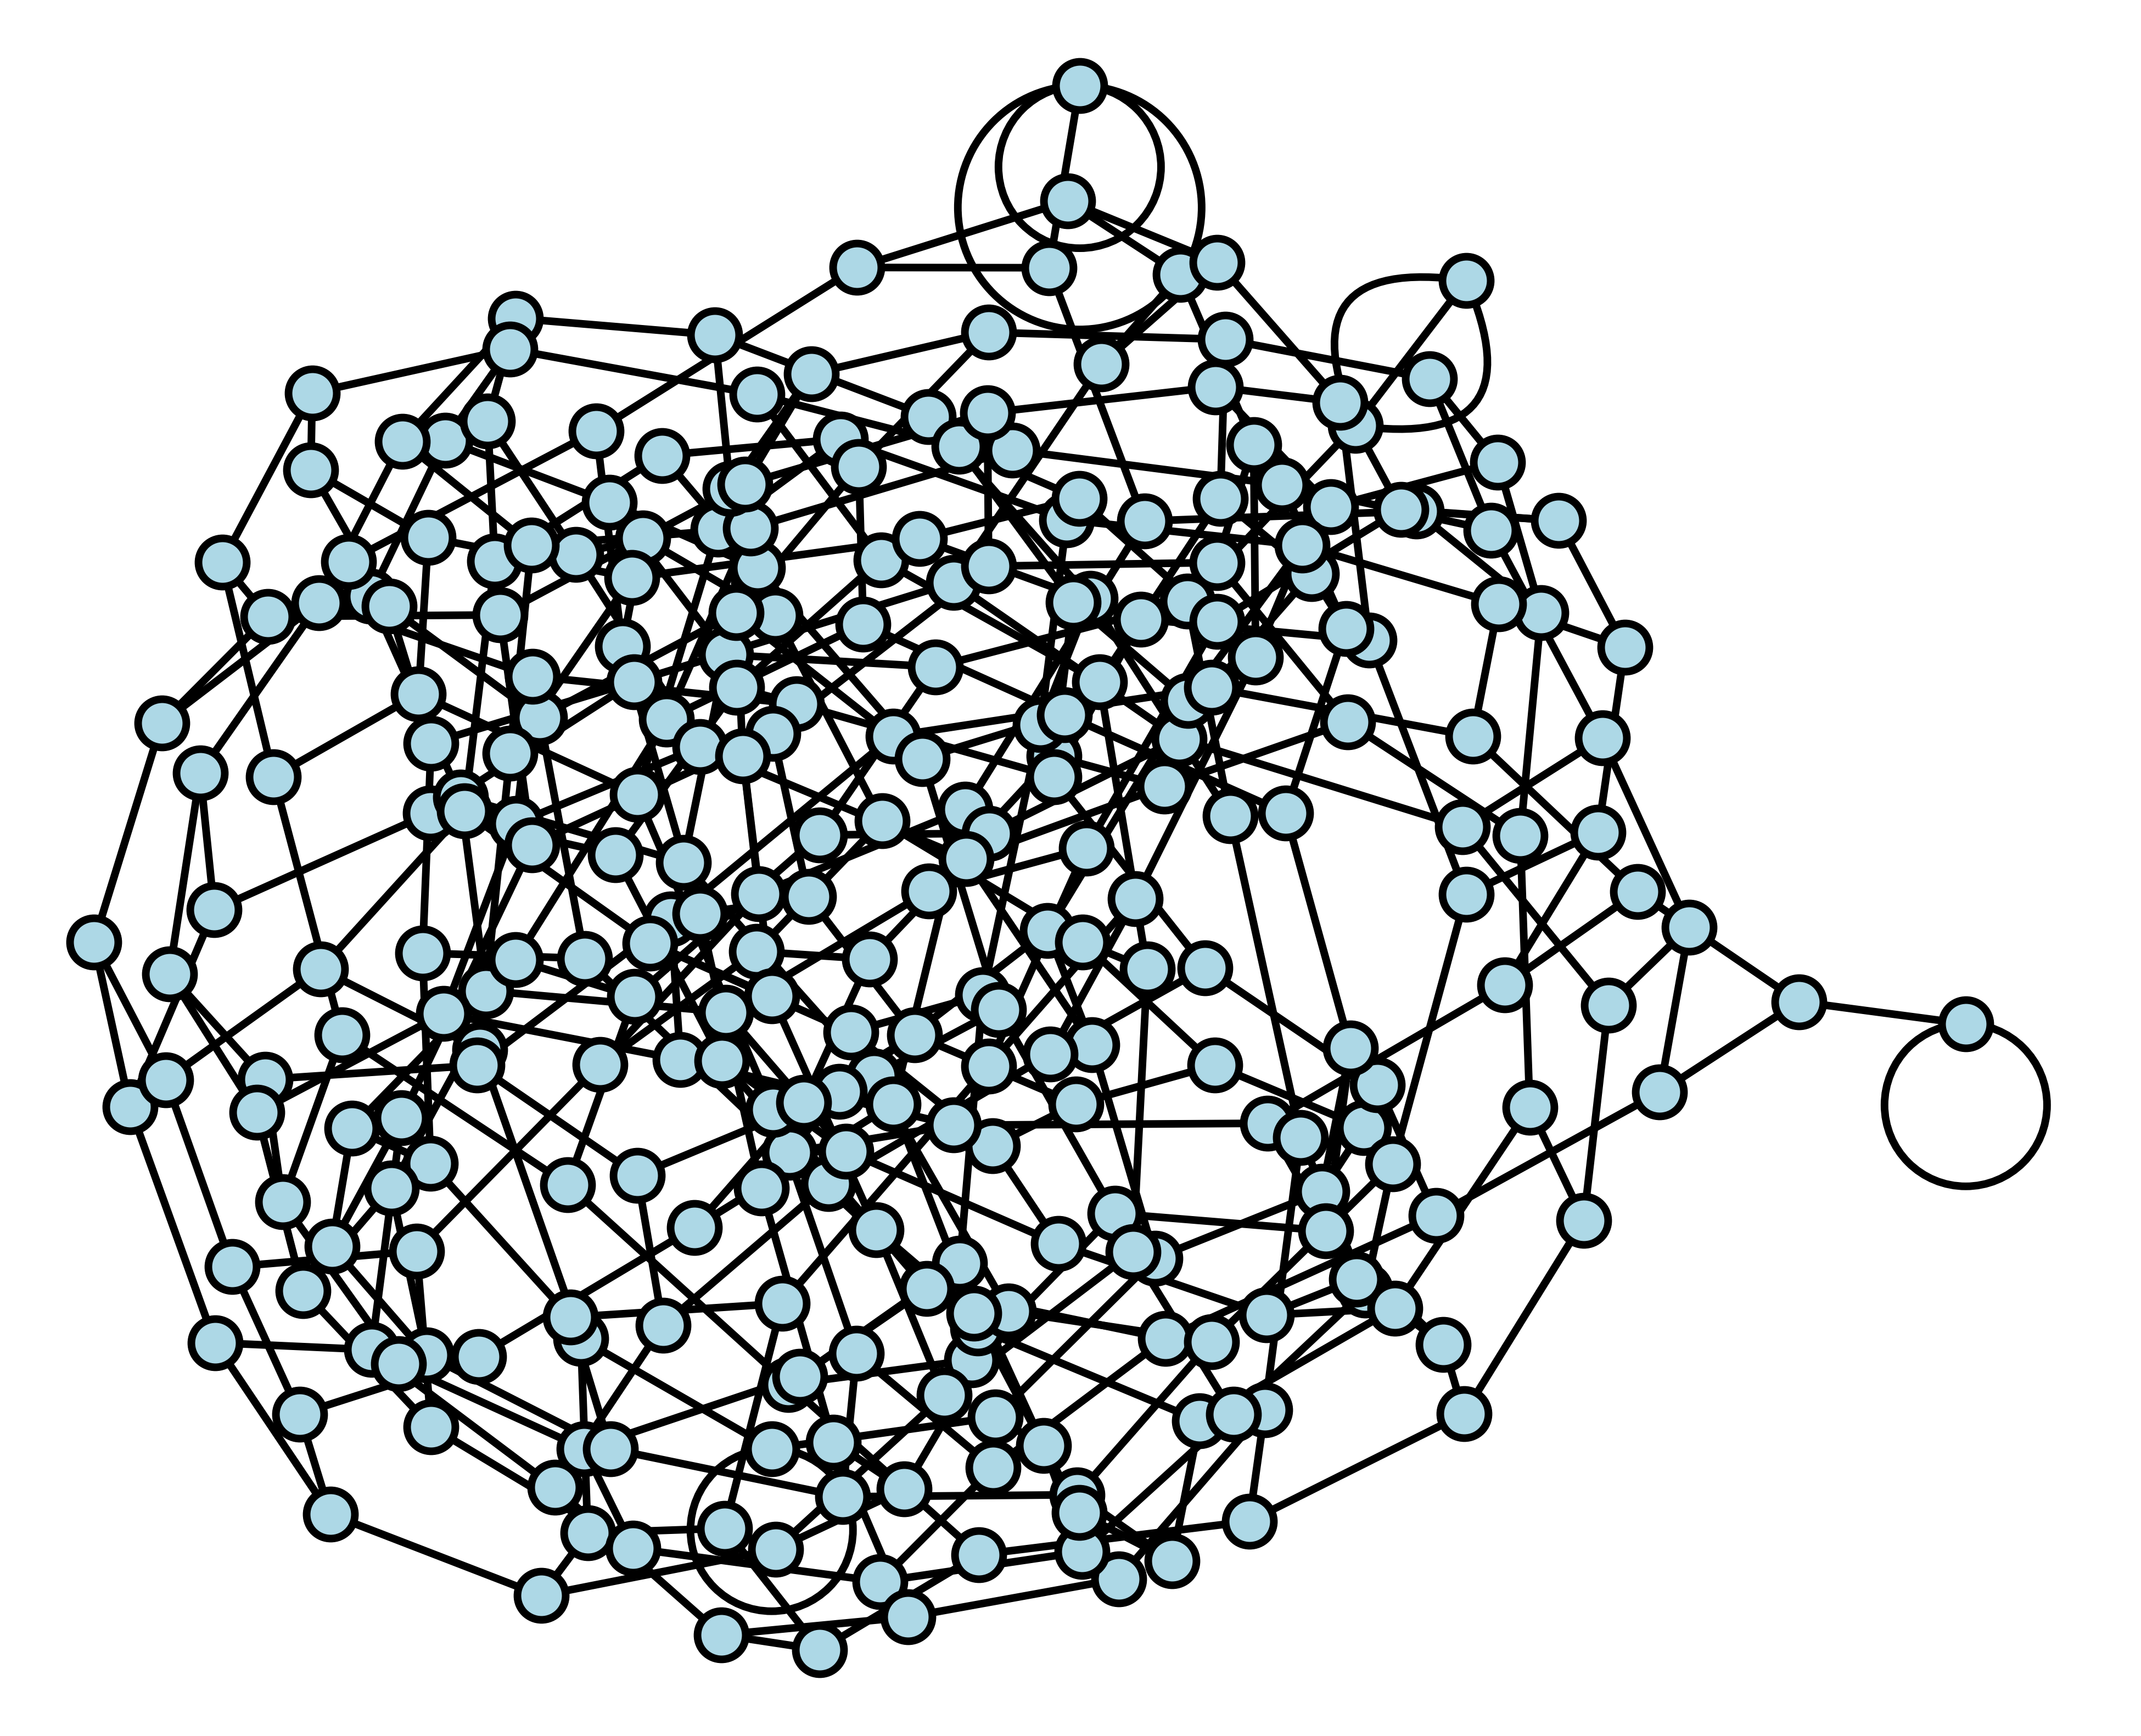

In [591]:
G.graphplot(iterations=1000, vertex_labels=False, vertex_size=40, vertex_color="lightblue", transparent=True, dpi=1000).show()